# Model

In [1]:
import numpy as np
import pandas as pd
import scipy as sp

from sklearn import preprocessing
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import grid_search
from sklearn import feature_selection as fs
from sklearn.metrics import confusion_matrix
import itertools

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#### Load Data

In [2]:
# Load normalized data
student_mat_normalized = pd.read_csv('datasets/student_mat_normalized.csv', delimiter=',')
student_por_normalized = pd.read_csv('datasets/student_por_normalized.csv', delimiter=',')

In [3]:
student_mat_normalized.head()

,age,traveltime,studytime,failures,absences,G1,G2,G3,school__GP,school__MS,...,Walc__2,Walc__3,Walc__4,Walc__5,health__1,health__2,health__3,health__4,health__5,pass
0,1.023046,0.792251,-0.042286,-0.449944,0.036424,-1.782467,-1.254791,-0.964934,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.238380,-0.643249,-0.042286,-0.449944,-0.213796,-1.782467,-1.520979,-0.964934,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,-1.330954,-0.643249,-0.042286,3.589323,0.536865,-1.179147,-0.722415,-0.090739,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,-1.330954,-0.643249,1.150779,-0.449944,-0.464016,1.234133,0.874715,1.002004,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,-0.546287,-0.643249,-0.042286,-0.449944,-0.213796,-1.480807,-0.190038,-0.090739,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [4]:
student_por_normalized.head()

,age,traveltime,studytime,failures,absences,G1,G2,G3,school__GP,school__MS,...,Walc__2,Walc__3,Walc__4,Walc__5,health__1,health__2,health__3,health__4,health__5,pass
0,1.031695,0.576718,0.083653,-0.374305,0.073433,-4.155470,-0.195820,-0.280658,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,0.210137,-0.760032,0.083653,-0.374305,-0.357863,-0.874570,-0.195820,-0.280658,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,-1.432980,-0.760032,0.083653,-0.374305,0.504730,0.219064,0.491137,0.029116,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,-1.432980,-0.760032,1.290114,-0.374305,-0.789159,0.948153,0.834615,0.648663,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,-0.611422,-0.760032,0.083653,-0.374305,-0.789159,-0.145481,0.491137,0.338889,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


## Model Building - Students Mathematics

Here we will build predictive models for the mathematics class students

#### Split data into train and test

Split our dataset into train and test and analyze the splits. We can explore and verify the matrix of classes to check if our data is balanced.

In [5]:
predictors = ['age','traveltime','studytime','failures','absences','school__GP','school__MS',
              'sex__F','sex__M','address__R','address__U','famsize__GT3','famsize__LE3','Pstatus__A',
              'Pstatus__T','Medu__0','Medu__1','Medu__2','Medu__3','Medu__4','Fedu__0','Fedu__1','Fedu__2',
              'Fedu__3','Fedu__4','Mjob__at_home','Mjob__health','Mjob__other','Mjob__services','Mjob__teacher',
              'Fjob__at_home','Fjob__health','Fjob__other','Fjob__services','Fjob__teacher','reason__course',
              'reason__home','reason__other','reason__reputation','guardian__father','guardian__mother',
              'guardian__other','schoolsup__no','schoolsup__yes','famsup__no','famsup__yes','paid__no',
              'paid__yes','activities__no','activities__yes','nursery__no','nursery__yes','higher__no',
              'higher__yes','internet__no','internet__yes','romantic__no','romantic__yes','famrel__1',
              'famrel__2','famrel__3','famrel__4','famrel__5','freetime__1','freetime__2','freetime__3',
              'freetime__4','freetime__5','goout__1','goout__2','goout__3','goout__4','goout__5','Dalc__1',
              'Dalc__2','Dalc__3','Dalc__4','Dalc__5','Walc__1','Walc__2','Walc__3','Walc__4','Walc__5',
              'health__1','health__2','health__3','health__4','health__5']
response = ['pass']

In [6]:
x = student_mat_normalized[predictors]
y = student_mat_normalized[response].values.ravel()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1234)

#Print some useful info for our test, train sets
print 'Train data: ', x_train.shape
print 'Test data: ', x_test.shape
print 'Train class 0: {}, train class 1: {}'.format(len(y_train[y_train == 0]), len(y_train[y_train == 1]))
print 'Test class 0: {}, test class 1: {}'.format(len(y_test[y_test == 0]), len(y_test[y_test == 1]))

Train data:  (276, 88)
Test data:  (119, 88)
Train class 0: 91, train class 1: 185
Test class 0: 39, test class 1: 80


From the above data we know our data is imbalanced

#### Feature Selection

In [7]:
# Best features
def get_best_feature(num_of_features,x, y):
    features = fs.SelectKBest(fs.f_regression, k=num_of_features) #k is number of features.
    features.fit(x, y)
    
    selected_features = features.get_support()
    selected_features_columns =  x.columns[selected_features].values
    return selected_features_columns


In [8]:
# Get best features
selected_features_columns = get_best_feature(20,x, y)
selected_features_columns

array(['age', 'failures', 'absences', 'Medu__4', 'Fedu__1', 'Fedu__4',
       'reason__course', 'guardian__other', 'schoolsup__no',
       'schoolsup__yes', 'paid__no', 'paid__yes', 'higher__no',
       'higher__yes', 'romantic__no', 'romantic__yes', 'goout__2',
       'goout__4', 'goout__5', 'Dalc__1'], dtype=object)

<a id='build_base_model'></a>

#### Build Base Models

First let us start with various classification models with their default parameters. Since our data has imbalanced classes we can set those parameters.

In [9]:
# Function for computing the accuracy a given model on the entire test set,
# the accuracy on class 0 in the test set
# and the accuracy on class 1
score = lambda model, x_test, y_test: pd.Series([model.score(x_test, y_test), 
                                                 model.score(x_test[y_test==0], y_test[y_test==0]),
                                                 model.score(x_test[y_test==1], y_test[y_test==1])],
                                                index=['overall accuracy', 'accuracy on class 0', 'accuracy on class 1'])

#### Logistic Regression:

In [10]:
# Unweighted logistic regression
unweighted_logistic = LogisticRegression()
unweighted_logistic.fit(x_train, y_train)
unweighted_log_scores = score(unweighted_logistic, x_test, y_test)

# Weighted logistic regression
weighted_logistic = LogisticRegression(class_weight='balanced')
weighted_logistic.fit(x_train, y_train)
weighted_log_scores = score(weighted_logistic, x_test, y_test)

print "Logistic regression (Unweighted):"
print unweighted_log_scores
print "Logistic regression (Weighted):"
print weighted_log_scores

Logistic regression (Unweighted):
overall accuracy       0.630252
accuracy on class 0    0.435897
accuracy on class 1    0.725000
dtype: float64
Logistic regression (Weighted):
overall accuracy       0.596639
accuracy on class 0    0.512821
accuracy on class 1    0.637500
dtype: float64


#### Linear Discriminant Analysis:

In [11]:
# LDA
lda = LDA()
lda.fit(x_train, y_train)
lda_scores = score(lda, x_test, y_test)

print "LDA:"
print lda_scores

LDA:
overall accuracy       0.630252
accuracy on class 0    0.410256
accuracy on class 1    0.737500
dtype: float64


//anaconda/envs/py27/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


#### Quadratic Discriminant Analysis

In [12]:
#QDA
qda = QDA()
qda.fit(x_train, y_train)
qda_scores = score(qda, x_test, y_test)

print "QDA:"
print qda_scores

QDA:
overall accuracy       0.386555
accuracy on class 0    0.897436
accuracy on class 1    0.137500
dtype: float64


//anaconda/envs/py27/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


#### Decision Trees

In [13]:
#Decision Trees
tree = DecisionTree()
tree.fit(x_train, y_train)
tree_scores = score(tree, x_test, y_test)

print "Decision Trees:"
print tree_scores

Decision Trees:
overall accuracy       0.596639
accuracy on class 0    0.487179
accuracy on class 1    0.650000
dtype: float64


#### Random Forest

In [14]:
# Random Forest
rf = RandomForest(class_weight='balanced')
rf.fit(x_train, y_train)
rf_scores = score(rf, x_test, y_test)

print "Random Forest:"
print rf_scores

Random Forest:
overall accuracy       0.613445
accuracy on class 0    0.487179
accuracy on class 1    0.675000
dtype: float64


#### Support Vector Classification

In [15]:
# SVC
svc = SVC(probability=True,class_weight='balanced')
svc.fit(x_train, y_train)
svc_scores = score(svc, x_test, y_test)

print "SVC:"
print svc_scores

SVC:
overall accuracy       0.630252
accuracy on class 0    0.384615
accuracy on class 1    0.750000
dtype: float64


#### K-Nearest Neighbors

In [16]:
# KNN
knn = KNN()
knn.fit(x_train, y_train)
knn_scores = score(knn, x_test, y_test)

print "KNN:"
print knn_scores

KNN:
overall accuracy       0.630252
accuracy on class 0    0.230769
accuracy on class 1    0.825000
dtype: float64


In [17]:
# Overall Score Dataframe
performance_metric = pd.DataFrame({'Unweighted Logistic': unweighted_log_scores,
                         'Weighted Logistic': weighted_log_scores,
                         'LDA': lda_scores,
                         'QDA': qda_scores,
                        'KNN': knn_scores,
                         'Tree': tree_scores,
                         'RF': rf_scores,'SVC':svc_scores})

#### Base Performance Metric

Our performance metric will be to build a model which has results that are better than the base models we have built so far

In [18]:
performance_metric

,KNN,LDA,QDA,RF,SVC,Tree,Unweighted Logistic,Weighted Logistic
overall accuracy,0.630252,0.630252,0.386555,0.613445,0.630252,0.596639,0.630252,0.596639
accuracy on class 0,0.230769,0.410256,0.897436,0.487179,0.384615,0.487179,0.435897,0.512821
accuracy on class 1,0.825000,0.737500,0.137500,0.675000,0.750000,0.650000,0.725000,0.637500


#### Tuning to Maximize Model Performance

#### Logistic Model

In [19]:
# Global variables to collect all the models we are tuning 
tune_params = pd.DataFrame(columns=('x_index','Model', 'class0', 'class1','overall'))
models =[]
feature_list = []
tune_params["x_index"] = tune_params["x_index"].astype(int)

In [20]:
### Logistic Model Tuning

def tune_logistic_reg_model(x_train,y_train,x_test,y_test,features):
    c_list = [0.00000001,0.0000001,0.000001,0.00001,0.0001, 0.001,0.01,0.015,0.02,0.03,0.04,0.08]
    l1_overall = []
    l1_class_0 = []
    l1_class_1 = []
    l2_overall = []
    l2_class_0 = []
    l2_class_1 = []
    
    model_count = tune_params.shape[0]

    for c in c_list:
        logistic = LogisticRegression(class_weight='balanced',C=c,penalty='l1')
        logistic.fit(x_train, y_train)
        logistic_scores = score(logistic, x_test, y_test)
        #print logistic_scores
        l1_overall.append(logistic_scores['overall accuracy'])
        l1_class_0.append(logistic_scores['accuracy on class 0'])
        l1_class_1.append(logistic_scores['accuracy on class 1'])
        
        tune_params.loc[model_count] = {'x_index':model_count,'Model':'Logistic l1/'+str(c), 'class0':logistic_scores['accuracy on class 0'], 'class1':logistic_scores['accuracy on class 1'],'overall':logistic_scores['overall accuracy']}
        model_count = model_count+1
        models.append(logistic)
        feature_list.append(features)
        
        logistic = LogisticRegression(class_weight='balanced',C=c,penalty='l2')
        logistic.fit(x_train, y_train)
        logistic_scores = score(logistic, x_test, y_test)
        #print logistic_scores
        l2_overall.append(logistic_scores['overall accuracy'])
        l2_class_0.append(logistic_scores['accuracy on class 0'])
        l2_class_1.append(logistic_scores['accuracy on class 1'])
        
        tune_params.loc[model_count] = {'x_index':model_count,'Model':'Logistic l2/'+str(c), 'class0':logistic_scores['accuracy on class 0'], 'class1':logistic_scores['accuracy on class 1'],'overall':logistic_scores['overall accuracy']}
        model_count = model_count+1
        models.append(logistic)
        feature_list.append(features)


    best_l1_class_1_accuracy = np.argmax(l1_class_1)
    best_l2_class_1_accuracy = np.argmax(l2_class_1)
    print "Best Class 1 accuracy is for L1 and C: " , c_list[best_l1_class_1_accuracy] , " Class 1: ",round(l1_class_1[best_l1_class_1_accuracy],5) , " Class 0: ",round(l1_class_0[best_l1_class_1_accuracy],5)
    print "Best Class 1 accuracy is for L2 and C: " , c_list[best_l2_class_1_accuracy] , " Class 1: ",round(l2_class_1[best_l2_class_1_accuracy],5) , " Class 0: ",round(l2_class_0[best_l2_class_1_accuracy],5)

    # Plot the results
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    ax[0].plot(c_list,l1_overall,color='r',label='Overall')
    ax[0].plot(c_list,l1_class_0,color='b',label='Class 0')
    ax[0].plot(c_list,l1_class_1,color='g',label='Class 1')
    ax[0].set_title("Log Reg, Balanced with penalty=l1")
    ax[0].set_xlabel('C')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend(loc = 'best')

    ax[1].plot(c_list,l2_overall,color='r',label='Overall')
    ax[1].plot(c_list,l2_class_0,color='b',label='Class 0')
    ax[1].plot(c_list,l2_class_1,color='g',label='Class 1')
    ax[1].set_title("Log Reg, Balanced with penalty=l2")
    ax[1].set_xlabel('C')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(loc = 'best')

    plt.tight_layout()
    plt.show()

Tuning params for Logistic Regression with all features:
Best Class 1 accuracy is for L1 and C:  0.02  Class 1:  0.825  Class 0:  0.38462
Best Class 1 accuracy is for L2 and C:  1e-08  Class 1:  0.7875  Class 0:  0.46154


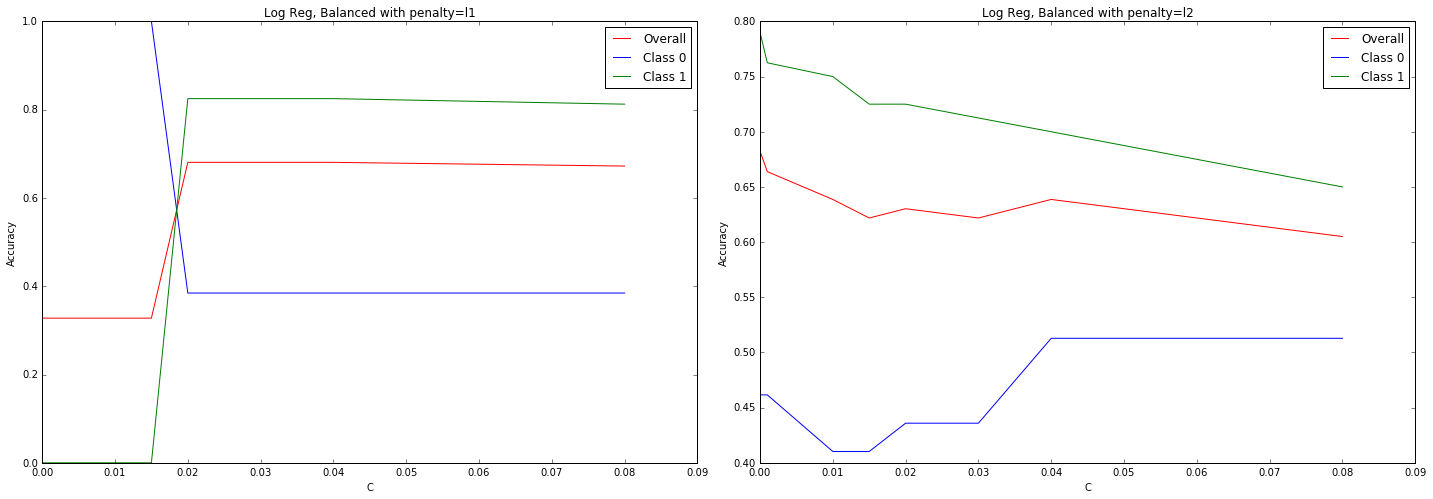

In [21]:
# Tune parameters
print "Tuning params for Logistic Regression with all features:"
tune_logistic_reg_model(x_train,y_train,x_test,y_test,[])

Tuning params for Logistic Regression with top 30 features:
Best Class 1 accuracy is for L1 and C:  0.02  Class 1:  0.825  Class 0:  0.38462
Best Class 1 accuracy is for L2 and C:  1e-08  Class 1:  0.775  Class 0:  0.48718


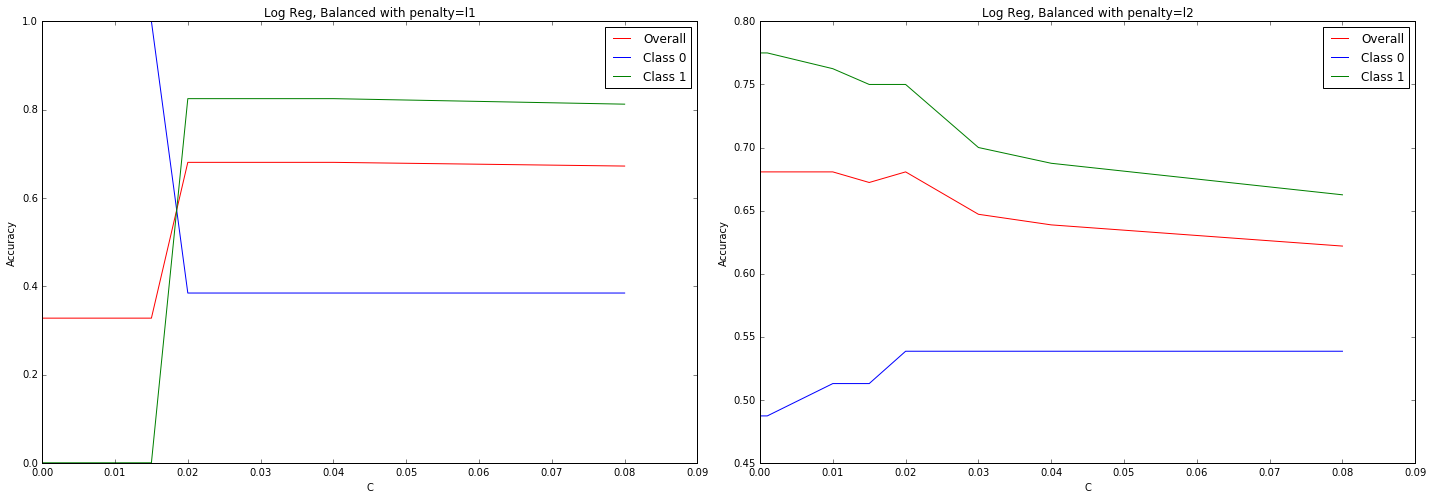

In [22]:
# Tune parameters
print "Tuning params for Logistic Regression with top 30 features:"

# Get best features
selected_features_columns = get_best_feature(30,x, y)
tune_logistic_reg_model(x_train[selected_features_columns],y_train
                        ,x_test[selected_features_columns],y_test,selected_features_columns)

Tuning params for Logistic Regression with top 20 features:
Best Class 1 accuracy is for L1 and C:  0.02  Class 1:  0.825  Class 0:  0.38462
Best Class 1 accuracy is for L2 and C:  1e-08  Class 1:  0.775  Class 0:  0.48718


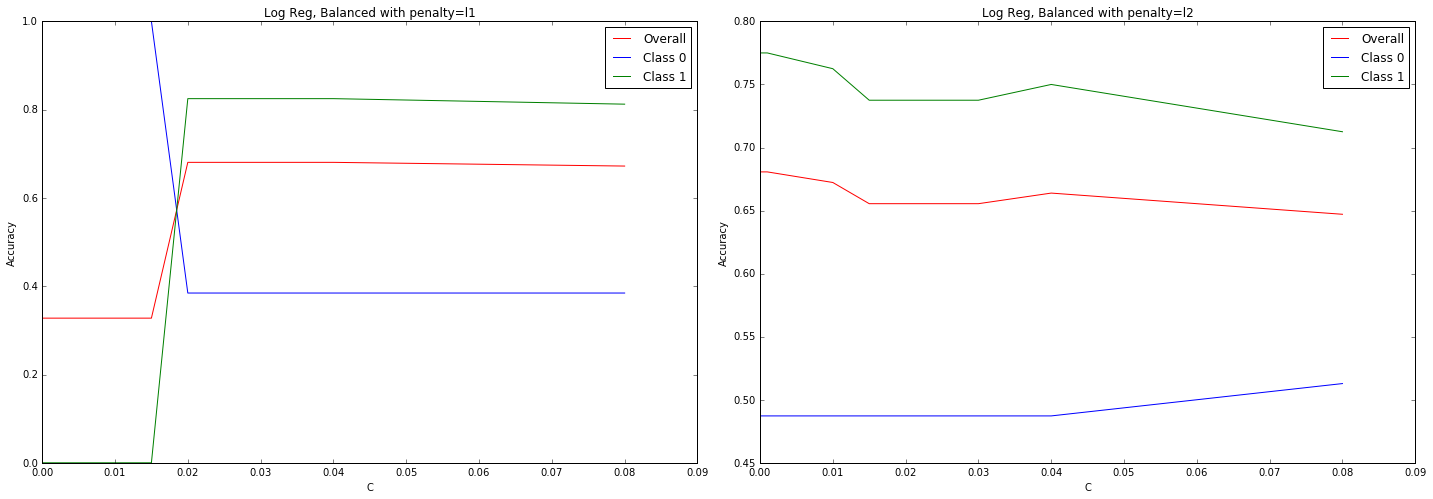

In [23]:
# Tune parameters
print "Tuning params for Logistic Regression with top 20 features:"

# Get best features
selected_features_columns = get_best_feature(20,x, y)
tune_logistic_reg_model(x_train[selected_features_columns],y_train
                        ,x_test[selected_features_columns],y_test,selected_features_columns)

#### Random Forest

##### Tuning parameters for random forests
There are some important parameters for random forest that help in fine-tuning the results of the random forest models. Some of the tuning parameters considers for tuning were:
- Node size: In random forest since the forest are allowed to grow without pruning, the trees can have very few observations in the leaf nodes. In order to reduce the bias as much as possible we can control the node size by setting the 'min_samples_leaf' parameter in the random forest classifier
- Number of trees: The number of trees is usually set to large number like a few hundrudes. The parameter to set to control number of trees is 'n_estimators'. The ideal value for the number of trees will depend on the number of observations and predictors in our dataset.
- Number of predictors sampled: This parameter is important in determining how the tree grows independently and not being biased to just one or a few predictors. The parameter is set by using the 'max_features' argument.
- Maximum depth: This argument determines the maximum depth of the tree. This argument controls if we want to expand the tree down so that we have all our leaves as pure nodes.
- OOB score: The OOB score is set to True or False. It determines whether to use out-of-bag samples to estimate the generalization accuracy or not

In [24]:
### Random Forest Model Tuning

def tune_random_forest_model(x_train,y_train,x_test,y_test):
    model_count = tune_params.shape[0]
    
    rf = RandomForest(n_estimators=500,class_weight='balanced',oob_score=False,max_depth=10,min_samples_leaf=5,criterion='gini')
    rf.fit(x_train, y_train)
    rf_scores = score(rf, x_test, y_test)
    print "RF 1: " , "Accuracy Class 1:" , rf_scores['accuracy on class 1'] , " Class 0:" , rf_scores['accuracy on class 0']
    tune_params.loc[model_count] = {'x_index':model_count,'Model':'Random Forest 1', 'class0':rf_scores['accuracy on class 0'], 'class1':rf_scores['accuracy on class 1'],'overall':rf_scores['overall accuracy']}
    model_count = model_count +1
    models.append(rf)
    feature_list.append([])
    
    rf = RandomForest(n_estimators=500,class_weight='balanced',oob_score=True,max_depth=20,min_samples_leaf=5,criterion='gini',max_features=None)
    rf.fit(x_train, y_train)
    rf_scores = score(rf, x_test, y_test)
    print "RF 2: " , "Accuracy Class 1:" , rf_scores['accuracy on class 1'] , " Class 0:" , rf_scores['accuracy on class 0']
    tune_params.loc[model_count] = {'x_index':model_count,'Model':'Random Forest 2', 'class0':rf_scores['accuracy on class 0'], 'class1':rf_scores['accuracy on class 1'],'overall':rf_scores['overall accuracy']}
    model_count = model_count +1
    models.append(rf)
    feature_list.append([])
    
    rf = RandomForest(n_estimators=500,class_weight='balanced',oob_score=False,max_depth=31,min_samples_leaf=5,criterion='gini',max_features=None)
    rf.fit(x_train, y_train)
    rf_scores = score(rf, x_test, y_test)
    print "RF 3: " , "Accuracy Class 1:" , rf_scores['accuracy on class 1'] , " Class 0:" , rf_scores['accuracy on class 0']
    tune_params.loc[model_count] = {'x_index':model_count,'Model':'Random Forest 3', 'class0':rf_scores['accuracy on class 0'], 'class1':rf_scores['accuracy on class 1'],'overall':rf_scores['overall accuracy']}
    model_count = model_count +1
    models.append(rf)
    feature_list.append([])
    
    rf = RandomForest(n_estimators=500,class_weight='balanced',oob_score=False,max_depth=5,min_samples_leaf=4,criterion='entropy',max_features='log2')
    rf.fit(x_train, y_train)
    rf_scores = score(rf, x_test, y_test)
    print "RF 4: " , "Accuracy Class 1:" , rf_scores['accuracy on class 1'] , " Class 0:" , rf_scores['accuracy on class 0']
    tune_params.loc[model_count] = {'x_index':model_count,'Model':'Random Forest 4', 'class0':rf_scores['accuracy on class 0'], 'class1':rf_scores['accuracy on class 1'],'overall':rf_scores['overall accuracy']}
    model_count = model_count +1
    models.append(rf)
    feature_list.append([])
    
    rf = RandomForest(n_estimators=500,class_weight='balanced',oob_score=False,max_depth=10,min_samples_leaf=5,criterion='gini',min_samples_split=4)
    rf.fit(x_train, y_train)
    rf_scores = score(rf, x_test, y_test)
    print "RF 5: " , "Accuracy Class 1:" , rf_scores['accuracy on class 1'] , " Class 0:" , rf_scores['accuracy on class 0']
    tune_params.loc[model_count] = {'x_index':model_count,'Model':'Random Forest 5', 'class0':rf_scores['accuracy on class 0'], 'class1':rf_scores['accuracy on class 1'],'overall':rf_scores['overall accuracy']}
    model_count = model_count +1
    models.append(rf)
    feature_list.append([])
    
    rf = RandomForest(n_estimators=500,class_weight='balanced',oob_score=False,max_depth=35,min_samples_leaf=5,criterion='entropy',min_samples_split=8)
    rf.fit(x_train, y_train)
    rf_scores = score(rf, x_test, y_test)
    print "RF 6: " , "Accuracy Class 1:" , rf_scores['accuracy on class 1'] , " Class 0:" , rf_scores['accuracy on class 0']
    tune_params.loc[model_count] = {'x_index':model_count,'Model':'Random Forest 6', 'class0':rf_scores['accuracy on class 0'], 'class1':rf_scores['accuracy on class 1'],'overall':rf_scores['overall accuracy']}
    model_count = model_count +1
    models.append(rf)
    feature_list.append([])
    
    rf = RandomForest(n_estimators=500,class_weight='balanced',oob_score=False,max_depth=10,min_samples_leaf=15,criterion='gini',min_samples_split=12)
    rf.fit(x_train, y_train)
    rf_scores = score(rf, x_test, y_test)
    print "RF 7: " , "Accuracy Class 1:" , rf_scores['accuracy on class 1'] , " Class 0:" , rf_scores['accuracy on class 0']
    tune_params.loc[model_count] = {'x_index':model_count,'Model':'Random Forest 7', 'class0':rf_scores['accuracy on class 0'], 'class1':rf_scores['accuracy on class 1'],'overall':rf_scores['overall accuracy']}
    model_count = model_count +1
    models.append(rf)
    feature_list.append([])
    
    rf = RandomForest(n_estimators=500,class_weight='balanced',oob_score=False,max_depth=10,min_samples_leaf=10,criterion='entropy',min_samples_split=25)
    rf.fit(x_train, y_train)
    rf_scores = score(rf, x_test, y_test)
    print "RF 8: " , "Accuracy Class 1:" , rf_scores['accuracy on class 1'] , " Class 0:" , rf_scores['accuracy on class 0']
    tune_params.loc[model_count] = {'x_index':model_count,'Model':'Random Forest 8', 'class0':rf_scores['accuracy on class 0'], 'class1':rf_scores['accuracy on class 1'],'overall':rf_scores['overall accuracy']}
    model_count = model_count +1
    models.append(rf)
    feature_list.append([])
    
    

In [25]:
# Tune parameters
print "Tuning params:"
tune_random_forest_model(x_train,y_train,x_test,y_test)

Tuning params:
RF 1:  Accuracy Class 1: 0.7375  Class 0: 0.435897435897
RF 2:  Accuracy Class 1: 0.7625  Class 0: 0.410256410256
RF 3:  Accuracy Class 1: 0.7625  Class 0: 0.410256410256
RF 4:  Accuracy Class 1: 0.725  Class 0: 0.358974358974
RF 5:  Accuracy Class 1: 0.75  Class 0: 0.435897435897
RF 6:  Accuracy Class 1: 0.7375  Class 0: 0.410256410256
RF 7:  Accuracy Class 1: 0.7125  Class 0: 0.512820512821
RF 8:  Accuracy Class 1: 0.7375  Class 0: 0.461538461538


In [26]:
print "Number of models we have collected: " , tune_params.shape[0], len(models)
tune_params.head()

Number of models we have collected:  80 80


,x_index,Model,class0,class1,overall
0,0,Logistic l1/1e-08,1.000000,0.0000,0.327731
1,1,Logistic l2/1e-08,0.461538,0.7875,0.680672
2,2,Logistic l1/1e-07,1.000000,0.0000,0.327731
3,3,Logistic l2/1e-07,0.461538,0.7875,0.680672
4,4,Logistic l1/1e-06,1.000000,0.0000,0.327731


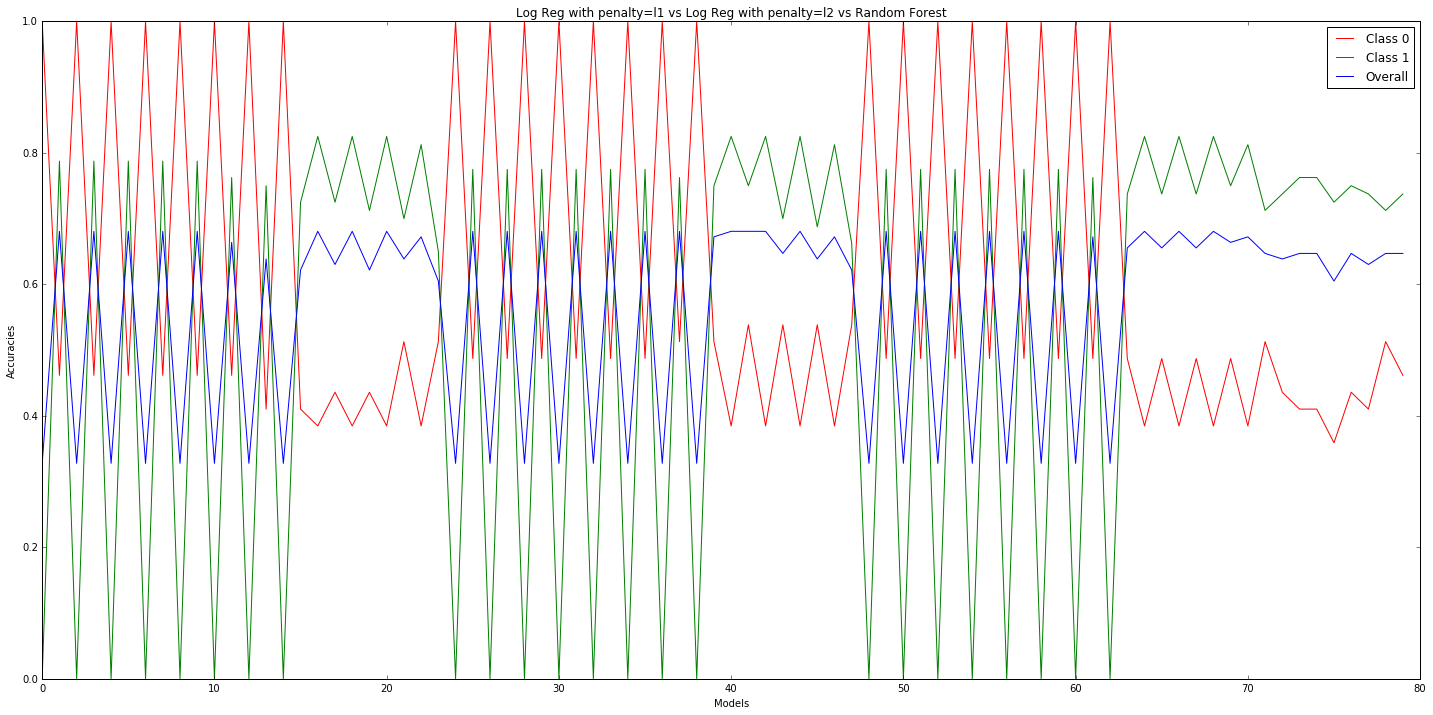

In [27]:
# Plot the model scores
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

ax.plot(range(tune_params.shape[0]),tune_params['class0'].values,color='r',label='Class 0')
ax.plot(range(tune_params.shape[0]),tune_params['class1'].values,color='g',label='Class 1')
ax.plot(range(tune_params.shape[0]),tune_params['overall'].values,color='b',label='Overall')

ax.set_title("Log Reg with penalty=l1 vs Log Reg with penalty=l2 vs Random Forest")
ax.set_xlabel('Models')
ax.set_ylabel('Accuracies')
ax.legend(loc = 'best')

plt.tight_layout()
plt.show()

#### Perform Cross Validation

In this step we will perform k fold cross validation on the all the tuned models. This steps ensures that we have generalized results independent of datasets.

In [28]:
def cross_validate_model(model,x,y,k):
    total_rows = x.shape[0]
    # Create a k-fold split using sklearn
    kf = KFold(total_rows, n_folds=k)
    k_index = 0
    model_scores = []
    for train_index, test_index in kf:
        k_index = k_index +1
        x_train = x.values[train_index,:]
        x_test = x.values[test_index,:]
            
        y_train = y[train_index]
        y_test = y[test_index]
        
        # Fit model
        model.fit(x_train, y_train)
        model_score = score(model, x_test, y_test)
        model_scores.append(model_score)
    
    scores_df = pd.concat(model_scores, axis=1)
    return scores_df.mean(axis=1)

In [29]:
# Perform k fold cross validations on all the top models
k = 8
tune_params['cv_class0'] = 0.0
tune_params['cv_class1'] = 0.0
tune_params['cv_overall'] = 0.0

# x = student_mat_normalized.values[:, :-1]
# y = student_mat_normalized.values[:, -1]

y = student_mat_normalized[response].values.ravel()

for index, row in tune_params.iterrows():
    #print row['x_index'],models[row['x_index']],feature_list[row['x_index']]
    if len(feature_list[row['x_index']]) == 0:
        x = student_mat_normalized[predictors]
    else:
        x = student_mat_normalized[feature_list[row['x_index']]]
    model_scores = cross_validate_model(models[row['x_index']],x,y,k)
    tune_params.set_value(index, 'cv_class0', model_scores.iloc[1])
    tune_params.set_value(index, 'cv_class1', model_scores.iloc[2])
    tune_params.set_value(index, 'cv_overall', model_scores.iloc[0])
    
tune_params.head()

,x_index,Model,class0,class1,overall,cv_class0,cv_class1,cv_overall
0,0,Logistic l1/1e-08,1.000000,0.0000,0.327731,1.000000,0.000000,0.329388
1,1,Logistic l2/1e-08,0.461538,0.7875,0.680672,0.448336,0.801241,0.693469
2,2,Logistic l1/1e-07,1.000000,0.0000,0.327731,1.000000,0.000000,0.329388
3,3,Logistic l2/1e-07,0.461538,0.7875,0.680672,0.448336,0.801241,0.693469
4,4,Logistic l1/1e-06,1.000000,0.0000,0.327731,1.000000,0.000000,0.329388


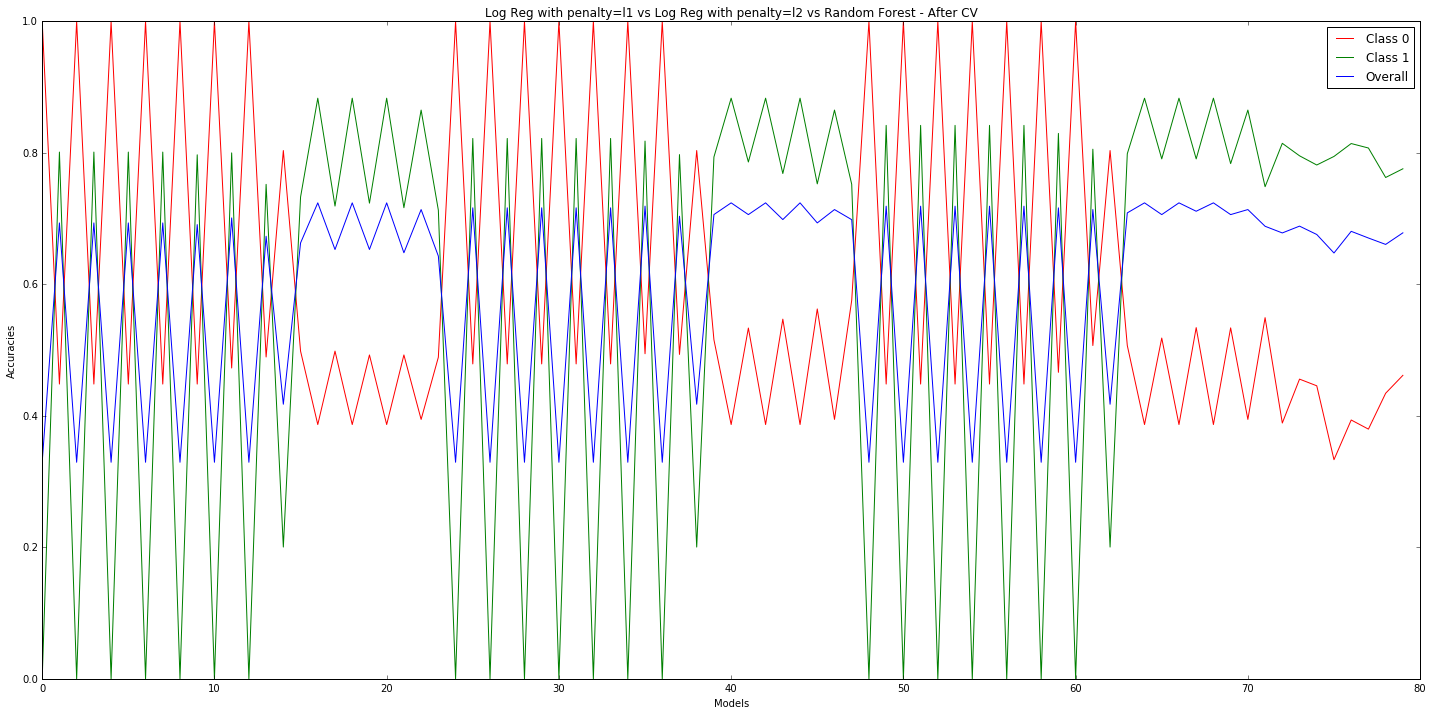

In [30]:
# Plot the model scores
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

ax.plot(range(tune_params.shape[0]),tune_params['cv_class0'].values,color='r',label='Class 0')
ax.plot(range(tune_params.shape[0]),tune_params['cv_class1'].values,color='g',label='Class 1')
ax.plot(range(tune_params.shape[0]),tune_params['cv_overall'].values,color='b',label='Overall')

ax.set_title("Log Reg with penalty=l1 vs Log Reg with penalty=l2 vs Random Forest - After CV")
ax.set_xlabel('Models')
ax.set_ylabel('Accuracies')
ax.legend(loc = 'best')

plt.tight_layout()
plt.show()

In [31]:
### Utility methods
# Compute confusion matrix
def plt_cnf(model, X, y):
    y_pred = model.predict(X)
    cnf_matrix = confusion_matrix(y, y_pred)
    #print cnf_matrix
    np.set_printoptions(precision=1)

    # Plot confusion matrix
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    img1 = plot_confusion_matrix(ax, cnf_matrix, classes=[0, 1],title='Confusion matrix')

    plt.colorbar(img1, ax=ax)
    plt.show()

def plot_confusion_matrix(ax, cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    img = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)

    ax.set_yticklabels(["", "0", "", "1"], rotation=45)


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    return img

#### Select Top Performing Models

From the accuracy scores from the previous steps we can pick three models as our final models
- A model that performs well overall on both class 0 and class 1 predictions
- A model that performs well on class 0 predictions
- A model that performs well on class 1 predictions

In [32]:
tune_params.sort_values(['cv_overall'], ascending=[False]).head(5)

,x_index,Model,class0,class1,overall,cv_class0,cv_class1,cv_overall
40,40,Logistic l1/0.02,0.384615,0.825,0.680672,0.386764,0.883185,0.72398
68,68,Logistic l1/0.04,0.384615,0.825,0.680672,0.386764,0.883185,0.72398
20,20,Logistic l1/0.04,0.384615,0.825,0.680672,0.386764,0.883185,0.72398
18,18,Logistic l1/0.03,0.384615,0.825,0.680672,0.386764,0.883185,0.72398
64,64,Logistic l1/0.02,0.384615,0.825,0.680672,0.386764,0.883185,0.72398


In [33]:
models[40]

LogisticRegression(C=0.02, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

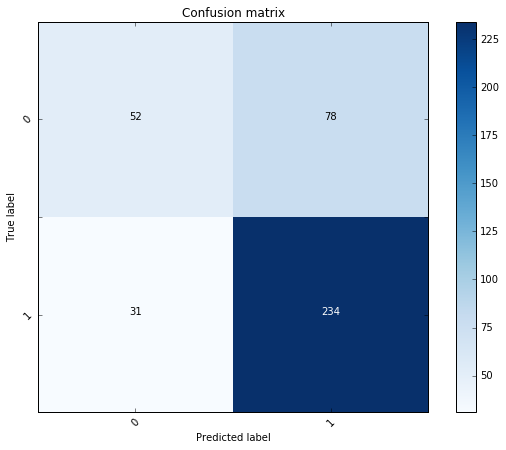

In [34]:
plt_cnf(models[40],student_mat_normalized[feature_list[40]],y)

In [35]:
tune_params[tune_params['cv_class0'] < 1.0].sort_values(['cv_class0'], ascending=[False]).head(5)

,x_index,Model,class0,class1,overall,cv_class0,cv_class1,cv_overall
14,14,Logistic l1/0.015,1.000000,0.0000,0.327731,0.803571,0.200397,0.417653
38,38,Logistic l1/0.015,1.000000,0.0000,0.327731,0.803571,0.200397,0.417653
62,62,Logistic l1/0.015,1.000000,0.0000,0.327731,0.803571,0.200397,0.417653
47,47,Logistic l2/0.08,0.538462,0.6625,0.621849,0.575752,0.752172,0.698418
45,45,Logistic l2/0.04,0.538462,0.6875,0.638655,0.562594,0.752867,0.693469


In [36]:
models[38]

LogisticRegression(C=0.015, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

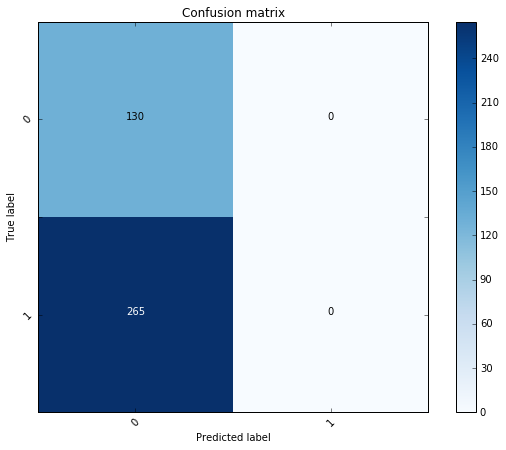

In [37]:
plt_cnf(models[38],student_mat_normalized[feature_list[38]],y)

In [38]:
tune_params[tune_params['cv_class1'] < 1.0].sort_values(['cv_class1'], ascending=[False]).head(5)

,x_index,Model,class0,class1,overall,cv_class0,cv_class1,cv_overall
40,40,Logistic l1/0.02,0.384615,0.825,0.680672,0.386764,0.883185,0.72398
42,42,Logistic l1/0.03,0.384615,0.825,0.680672,0.386764,0.883185,0.72398
64,64,Logistic l1/0.02,0.384615,0.825,0.680672,0.386764,0.883185,0.72398
44,44,Logistic l1/0.04,0.384615,0.825,0.680672,0.386764,0.883185,0.72398
20,20,Logistic l1/0.04,0.384615,0.825,0.680672,0.386764,0.883185,0.72398


In [39]:
models[40]

LogisticRegression(C=0.02, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

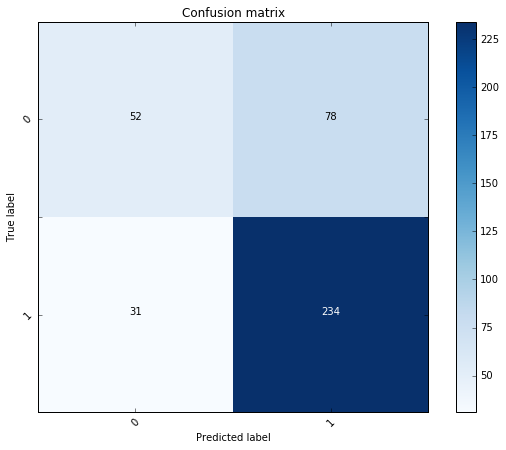

In [40]:
plt_cnf(models[40],student_mat_normalized[feature_list[40]],y)

## Model Building - Portuguese Language Class

Here we will build predictive models for the Portuguese language class students

In [41]:
x = student_por_normalized[predictors]
y = student_por_normalized[response].values.ravel()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1234)

#Print some useful info for our test, train sets
print 'Train data: ', x_train.shape
print 'Test data: ', x_test.shape
print 'Train class 0: {}, train class 1: {}'.format(len(y_train[y_train == 0]), len(y_train[y_train == 1]))
print 'Test class 0: {}, test class 1: {}'.format(len(y_test[y_test == 0]), len(y_test[y_test == 1]))

Train data:  (454, 88)
Test data:  (195, 88)
Train class 0: 67, train class 1: 387
Test class 0: 33, test class 1: 162


#### Build Base Models

First let us start with various classification models with their default parameters. Since our data has imbalanced classes we can set those parameters.

#### Logistic Regression:

In [42]:
# Unweighted logistic regression
unweighted_logistic = LogisticRegression()
unweighted_logistic.fit(x_train, y_train)
unweighted_log_scores = score(unweighted_logistic, x_test, y_test)

# Weighted logistic regression
weighted_logistic = LogisticRegression(class_weight='balanced')
weighted_logistic.fit(x_train, y_train)
weighted_log_scores = score(weighted_logistic, x_test, y_test)

print "Logistic regression (Unweighted):"
print unweighted_log_scores
print "Logistic regression (Weighted):"
print weighted_log_scores

Logistic regression (Unweighted):
overall accuracy       0.841026
accuracy on class 0    0.333333
accuracy on class 1    0.944444
dtype: float64
Logistic regression (Weighted):
overall accuracy       0.789744
accuracy on class 0    0.666667
accuracy on class 1    0.814815
dtype: float64


#### Linear Discriminant Analysis:

In [43]:
# LDA
lda = LDA()
lda.fit(x_train, y_train)
lda_scores = score(lda, x_test, y_test)

print "LDA:"
print lda_scores

LDA:
overall accuracy       0.856410
accuracy on class 0    0.424242
accuracy on class 1    0.944444
dtype: float64


#### Quadratic Discriminant Analysis

In [44]:
#QDA
qda = QDA()
qda.fit(x_train, y_train)
qda_scores = score(qda, x_test, y_test)

print "QDA:"
print qda_scores

QDA:
overall accuracy       0.692308
accuracy on class 0    0.242424
accuracy on class 1    0.777778
dtype: float64


#### Decision Trees

In [45]:
#Decision Trees
tree = DecisionTree()
tree.fit(x_train, y_train)
tree_scores = score(tree, x_test, y_test)

print "Decision Trees:"
print tree_scores

Decision Trees:
overall accuracy       0.810256
accuracy on class 0    0.515152
accuracy on class 1    0.870370
dtype: float64


#### Random Forest

In [46]:
# Random Forest
rf = RandomForest(class_weight='balanced')
rf.fit(x_train, y_train)
rf_scores = score(rf, x_test, y_test)

print "Random Forest:"
print rf_scores

Random Forest:
overall accuracy       0.825641
accuracy on class 0    0.121212
accuracy on class 1    0.969136
dtype: float64


#### Support Vector Classification

In [47]:
# SVC
svc = SVC(probability=True,class_weight='balanced')
svc.fit(x_train, y_train)
svc_scores = score(svc, x_test, y_test)

print "SVC:"
print svc_scores

SVC:
overall accuracy       0.769231
accuracy on class 0    0.757576
accuracy on class 1    0.771605
dtype: float64


#### K-Nearest Neighbors

In [48]:
# KNN
knn = KNN()
knn.fit(x_train, y_train)
knn_scores = score(knn, x_test, y_test)

print "KNN:"
print knn_scores

KNN:
overall accuracy       0.835897
accuracy on class 0    0.151515
accuracy on class 1    0.975309
dtype: float64


In [49]:
# Overall Score Dataframe
performance_metric = pd.DataFrame({'Unweighted Logistic': unweighted_log_scores,
                         'Weighted Logistic': weighted_log_scores,
                         'LDA': lda_scores,
                         'QDA': qda_scores,
                        'KNN': knn_scores,
                         'Tree': tree_scores,
                         'RF': rf_scores,'SVC':svc_scores})

#### Base Performance Metric

Our performance metric will be to build a model which has results that are better than the base models we have built so far

In [50]:
performance_metric

,KNN,LDA,QDA,RF,SVC,Tree,Unweighted Logistic,Weighted Logistic
overall accuracy,0.835897,0.856410,0.692308,0.825641,0.769231,0.810256,0.841026,0.789744
accuracy on class 0,0.151515,0.424242,0.242424,0.121212,0.757576,0.515152,0.333333,0.666667
accuracy on class 1,0.975309,0.944444,0.777778,0.969136,0.771605,0.870370,0.944444,0.814815


#### Tuning to Maximize Model Performance

#### Logistic Model

In [51]:
# Global variables to collect all the models we are tuning 
tune_params = pd.DataFrame(columns=('x_index','Model', 'class0', 'class1','overall'))
models =[]
feature_list = []
tune_params["x_index"] = tune_params["x_index"].astype(int)

Tuning params for Logistic Regression with all features:
Best Class 1 accuracy is for L1 and C:  0.01  Class 1:  0.88889  Class 0:  0.54545
Best Class 1 accuracy is for L2 and C:  0.03  Class 1:  0.81481  Class 0:  0.69697


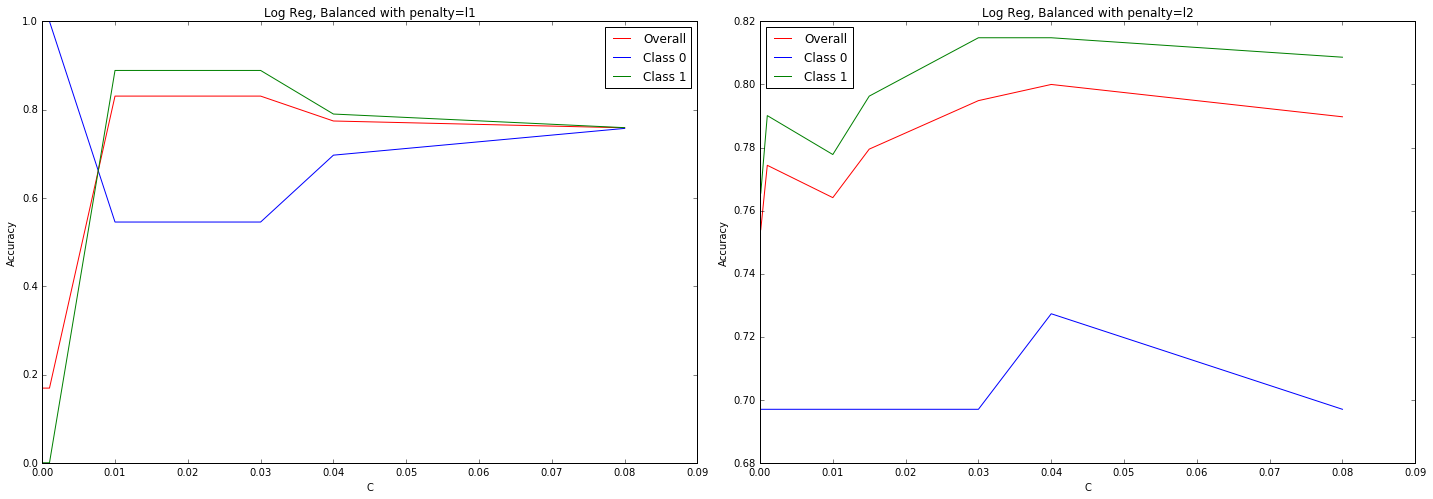

In [52]:
# Tune parameters
print "Tuning params for Logistic Regression with all features:"
tune_logistic_reg_model(x_train,y_train,x_test,y_test,[])

Tuning params for Logistic Regression with top 30 features:
Best Class 1 accuracy is for L1 and C:  0.01  Class 1:  0.88889  Class 0:  0.54545
Best Class 1 accuracy is for L2 and C:  0.08  Class 1:  0.77778  Class 0:  0.69697


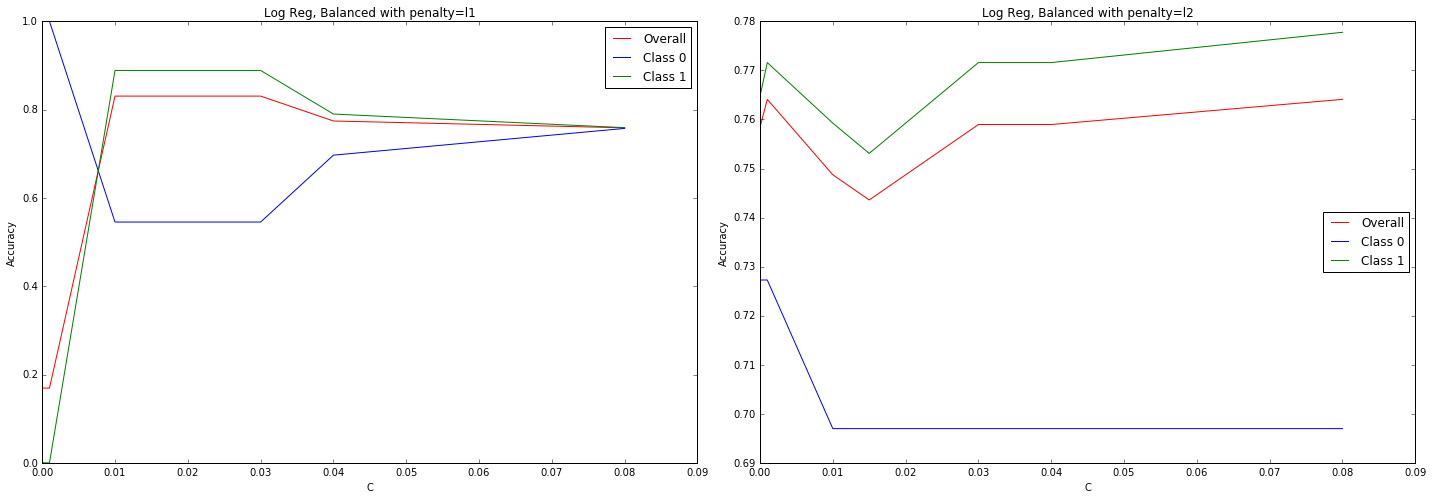

In [53]:
# Tune parameters
print "Tuning params for Logistic Regression with top 30 features:"

# Get best features
selected_features_columns = get_best_feature(30,x, y)
tune_logistic_reg_model(x_train[selected_features_columns],y_train
                        ,x_test[selected_features_columns],y_test,selected_features_columns)

Tuning params for Logistic Regression with top 20 features:
Best Class 1 accuracy is for L1 and C:  0.01  Class 1:  0.88889  Class 0:  0.54545
Best Class 1 accuracy is for L2 and C:  0.01  Class 1:  0.80247  Class 0:  0.69697


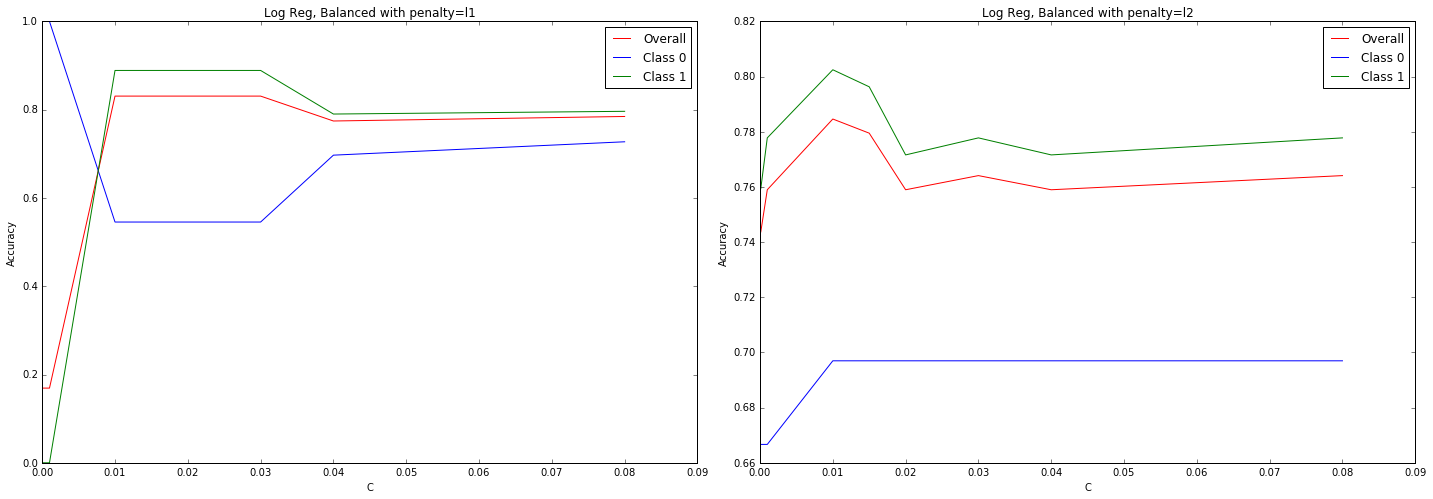

In [54]:
# Tune parameters
print "Tuning params for Logistic Regression with top 20 features:"

# Get best features
selected_features_columns = get_best_feature(20,x, y)
tune_logistic_reg_model(x_train[selected_features_columns],y_train
                        ,x_test[selected_features_columns],y_test,selected_features_columns)

#### Random Forest

In [55]:
# Tune parameters
print "Tuning params:"
tune_random_forest_model(x_train,y_train,x_test,y_test)

Tuning params:
RF 1:  Accuracy Class 1: 0.913580246914  Class 0: 0.575757575758
RF 2:  Accuracy Class 1: 0.851851851852  Class 0: 0.636363636364
RF 3:  Accuracy Class 1: 0.851851851852  Class 0: 0.636363636364
RF 4:  Accuracy Class 1: 0.882716049383  Class 0: 0.545454545455
RF 5:  Accuracy Class 1: 0.907407407407  Class 0: 0.515151515152
RF 6:  Accuracy Class 1: 0.925925925926  Class 0: 0.515151515152
RF 7:  Accuracy Class 1: 0.802469135802  Class 0: 0.69696969697
RF 8:  Accuracy Class 1: 0.808641975309  Class 0: 0.69696969697


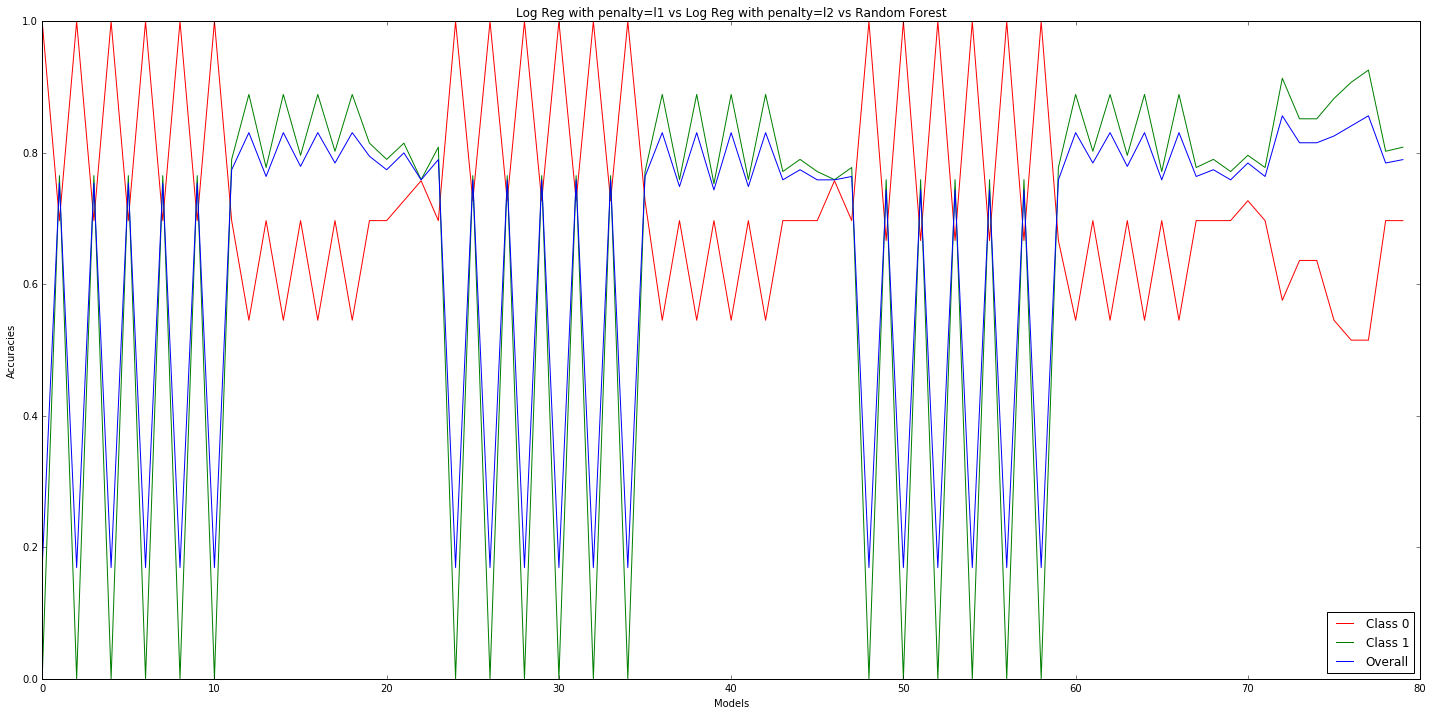

In [56]:
# Plot the model scores
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

ax.plot(range(tune_params.shape[0]),tune_params['class0'].values,color='r',label='Class 0')
ax.plot(range(tune_params.shape[0]),tune_params['class1'].values,color='g',label='Class 1')
ax.plot(range(tune_params.shape[0]),tune_params['overall'].values,color='b',label='Overall')

ax.set_title("Log Reg with penalty=l1 vs Log Reg with penalty=l2 vs Random Forest")
ax.set_xlabel('Models')
ax.set_ylabel('Accuracies')
ax.legend(loc = 'best')

plt.tight_layout()
plt.show()

#### Perform Cross Validation

In this step we will pick the top performing models and perform k fold cross validation. This steps ensures that we have generalized results independent of datasets.

In [57]:
# Perform k fold cross validations on all the top models
k = 8
tune_params['cv_class0'] = 0.0
tune_params['cv_class1'] = 0.0
tune_params['cv_overall'] = 0.0

y = student_por_normalized[response].values.ravel()

for index, row in tune_params.iterrows():
    #print row['x_index'],models[row['x_index']],feature_list[row['x_index']]
    if len(feature_list[row['x_index']]) == 0:
        x = student_por_normalized[predictors]
    else:
        x = student_por_normalized[feature_list[row['x_index']]]
    model_scores = cross_validate_model(models[row['x_index']],x,y,k)
    tune_params.set_value(index, 'cv_class0', model_scores.iloc[1])
    tune_params.set_value(index, 'cv_class1', model_scores.iloc[2])
    tune_params.set_value(index, 'cv_overall', model_scores.iloc[0])
    
tune_params.head()

,x_index,Model,class0,class1,overall,cv_class0,cv_class1,cv_overall
0,0,Logistic l1/1e-08,1.00000,0.000000,0.169231,1.000000,0.00000,0.154265
1,1,Logistic l2/1e-08,0.69697,0.765432,0.753846,0.568601,0.79352,0.784045
2,2,Logistic l1/1e-07,1.00000,0.000000,0.169231,1.000000,0.00000,0.154265
3,3,Logistic l2/1e-07,0.69697,0.765432,0.753846,0.568601,0.79352,0.784045
4,4,Logistic l1/1e-06,1.00000,0.000000,0.169231,1.000000,0.00000,0.154265


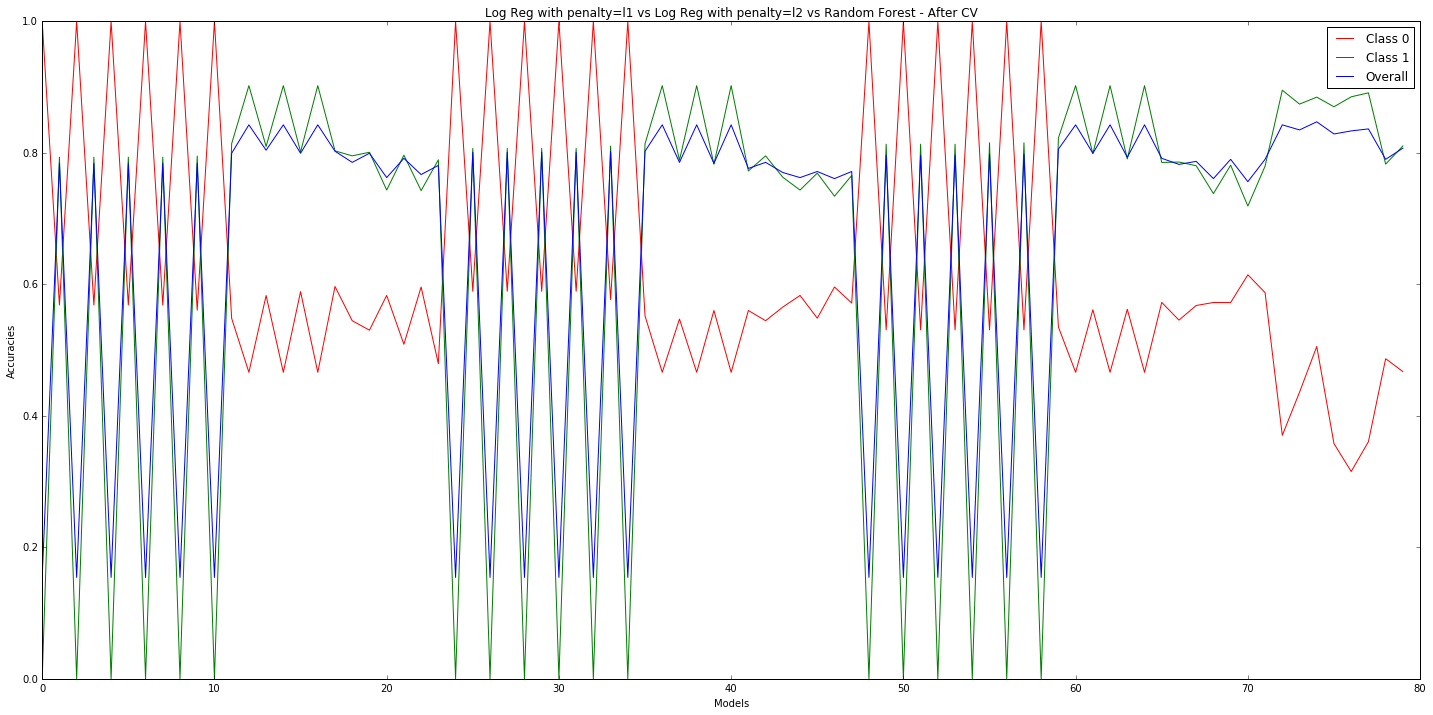

In [58]:
# Plot the model scores
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

ax.plot(range(tune_params.shape[0]),tune_params['cv_class0'].values,color='r',label='Class 0')
ax.plot(range(tune_params.shape[0]),tune_params['cv_class1'].values,color='g',label='Class 1')
ax.plot(range(tune_params.shape[0]),tune_params['cv_overall'].values,color='b',label='Overall')

ax.set_title("Log Reg with penalty=l1 vs Log Reg with penalty=l2 vs Random Forest - After CV")
ax.set_xlabel('Models')
ax.set_ylabel('Accuracies')
ax.legend(loc = 'best')

plt.tight_layout()
plt.show()

#### Select Top Performing Models

From the accuracy scores from the previous steps we can pick three models as our final models
- A model that performs well overall on both class 0 and class 1 predictions
- A model that performs well on class 0 predictions
- A model that performs well on class 1 predictions

In [59]:
tune_params.sort_values(['cv_overall'], ascending=[False]).head(5)

,x_index,Model,class0,class1,overall,cv_class0,cv_class1,cv_overall
74,74,Random Forest 3,0.636364,0.851852,0.815385,0.505506,0.884790,0.847260
40,40,Logistic l1/0.02,0.545455,0.888889,0.830769,0.466220,0.902261,0.842668
16,16,Logistic l1/0.02,0.545455,0.888889,0.830769,0.466220,0.902261,0.842668
64,64,Logistic l1/0.02,0.545455,0.888889,0.830769,0.466220,0.902261,0.842668
62,62,Logistic l1/0.015,0.545455,0.888889,0.830769,0.466220,0.902261,0.842668


In [68]:
models[74]

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=31, max_features=None,
            max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

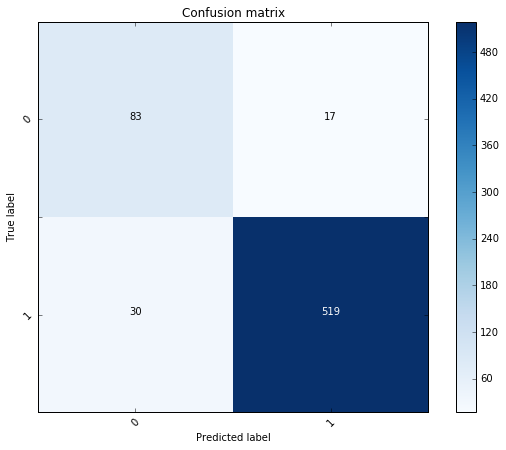

In [69]:
plt_cnf(models[74],x,y)

In [62]:
tune_params[tune_params['cv_class0'] < 1.0].sort_values(['cv_class0'], ascending=[False]).head(5)

,x_index,Model,class0,class1,overall,cv_class0,cv_class1,cv_overall
70,70,Logistic l1/0.08,0.727273,0.796296,0.784615,0.614583,0.719106,0.756229
17,17,Logistic l2/0.02,0.696970,0.802469,0.784615,0.596726,0.803055,0.802526
22,22,Logistic l1/0.08,0.757576,0.759259,0.758974,0.595982,0.742651,0.767051
46,46,Logistic l1/0.08,0.757576,0.759259,0.758974,0.595982,0.734088,0.760878
31,31,Logistic l2/1e-05,0.727273,0.765432,0.758974,0.589435,0.806725,0.801001


In [70]:
models[70]

LogisticRegression(C=0.08, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

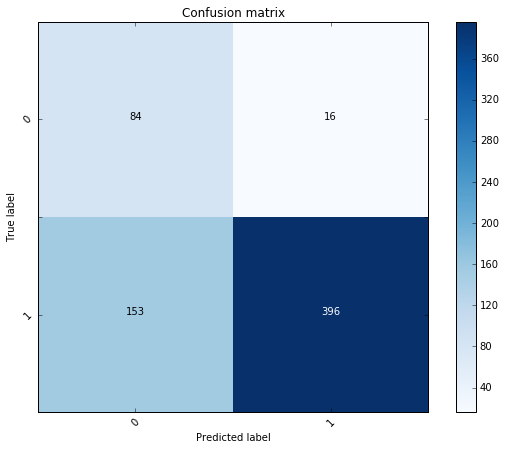

In [72]:
plt_cnf(models[70],student_por_normalized[feature_list[70]],y)

In [65]:
tune_params[tune_params['cv_class1'] < 1.0].sort_values(['cv_class1'], ascending=[False]).head(5)

,x_index,Model,class0,class1,overall,cv_class0,cv_class1,cv_overall
40,40,Logistic l1/0.02,0.545455,0.888889,0.830769,0.46622,0.902261,0.842668
64,64,Logistic l1/0.02,0.545455,0.888889,0.830769,0.46622,0.902261,0.842668
38,38,Logistic l1/0.015,0.545455,0.888889,0.830769,0.46622,0.902261,0.842668
16,16,Logistic l1/0.02,0.545455,0.888889,0.830769,0.46622,0.902261,0.842668
14,14,Logistic l1/0.015,0.545455,0.888889,0.830769,0.46622,0.902261,0.842668


In [66]:
models[40]

LogisticRegression(C=0.02, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

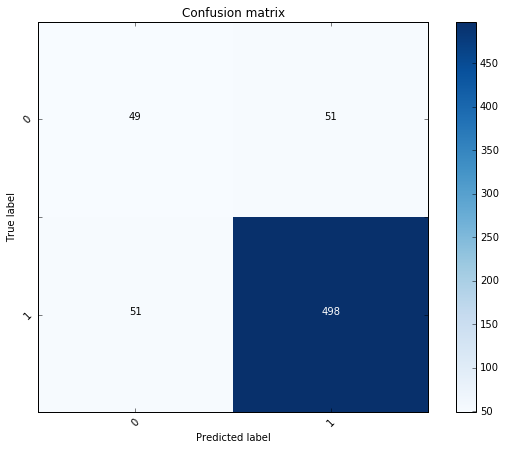

In [67]:
plt_cnf(models[40],student_por_normalized[feature_list[40]],y)